In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
pwd

'/Users/nealaggarwal/MIT/wk4'

In [24]:
ls

Advertising.csv
BM_Test.csv
BigmartSales.csv
Case_Study_BigMart_Sales_Prediction.ipynb
Hospital_LOS_Prediction.ipynb
LVC_1_%26_2_Practical_Application_Effects_of_Advertising_on_Sales.ipynb
bootstrapping.ipynb
healthcare_data.csv
numpy-class.ipynb
yorkie.jpg


In [26]:
ad_data = pd.read_csv('Advertising.csv')

In [27]:
ad_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [29]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


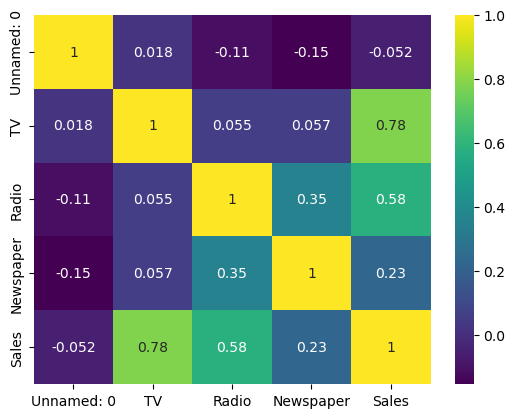

In [30]:
corrMatrix = ad_data.corr()
sns.heatmap(corrMatrix, annot=True, cmap="viridis")
plt.show()

In [31]:
ad_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [46]:
Y = ad_data['Sales']
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [38]:
X = ad_data.drop(['Newspaper'], axis=1)
X

,Unnamed: 0,TV,Radio,Sales
0,1,230.1,37.8,22.1
1,2,44.5,39.3,10.4
2,3,17.2,45.9,9.3
3,4,151.5,41.3,18.5
4,5,180.8,10.8,12.9
...,...,...,...,...
195,196,38.2,3.7,7.6
196,197,94.2,4.9,9.7
197,198,177.0,9.3,12.8
198,199,283.6,42.0,25.5


In [47]:
# 80:20 split for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# load linear regression model
lin_reg_model = LinearRegression()

# fit model to dataset
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [45]:
print('x', X_train.head(), '\n')
print('Y', Y_train.head())

x      Unnamed: 0     TV  Radio  Sales
79           80  116.0    7.7   11.0
197         198  177.0    9.3   12.8
38           39   43.1   26.7   10.1
24           25   62.3   12.6    9.7
122         123  224.0    2.4   11.6 

Y 79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
Name: Sales, dtype: float64


In [48]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [49]:
# R squared error
train_error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error - Training : ", train_error_score)

R squared Error - Training :  1.0


In [50]:
Y_pred = lin_reg_model.predict(X_test)

In [59]:
test_error_score = metrics.r2_score(Y_test, Y_pred)

In [63]:
Y_pred

array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 11.5, 14.9,  9.5,
        8.7, 11.9,  5.3, 10.3, 11.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5,
       10.9, 22.2,  9.3,  8.1, 21.7, 13.4, 10.6,  5.7, 10.6, 11.3, 23.7,
        8.7, 16.1, 20.7, 11.6, 20.8, 11.9,  6.9])

In [57]:
print("R squared Error - Test: ", test_error_score)

R squared Error - Test:  1.0


In [58]:
# create scatter plot with regression line
sns.regplot(Y_test, Y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"})

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given